#Linear Regression

In [1]:
import numpy as np

rng = np.random.default_rng(seed=42)
m = 200  # number of instances
X = 2 * rng.random((m, 1))  # column vector
y = 4 + 3 * X + rng.standard_normal((m, 1))  # column vector

In [3]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) #add x0 = 1 to each instance
theta_best=np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [4]:
theta_best

array([[3.69084138],
       [3.32960458]])

In [5]:
X_new = np.array([[0],[2]])
X_new_best=add_dummy_feature(X_new)
y_pred = X_new_best @ theta_best
y_pred

array([[ 3.69084138],
       [10.35005055]])

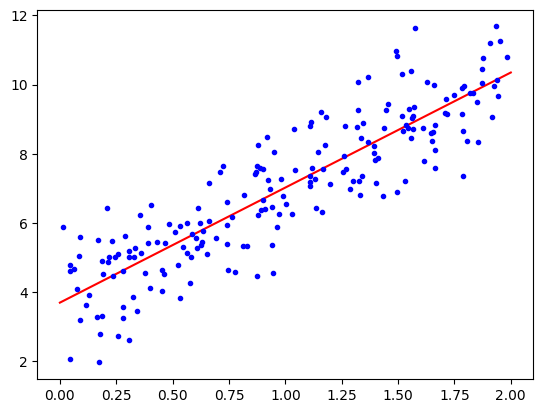

In [7]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_pred, "r-", label="Predictions")
plt.plot(X, y, "b.")
[...]  # beautify the figure: add labels, axis, grid, and legend
plt.show()

#Scikit-Learn way

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.69084138]), array([[3.32960458]]))

In [10]:
lin_reg.predict(X_new)

array([[ 3.69084138],
       [10.35005055]])

#Gradient Descent

# **Batch GD**

In [12]:
eta = 0.1 #Learning rate
n_epochs = 1000
m = len(X_b) # no of instance

rng = np.random.default_rng(seed=42)
theta = rng.standard_normal((2, 1))  # randomly initialized model parameters

for epochs in range(n_epochs):
  gradients = 2 / m * X_b.T @ (X_b @ theta - y)
  theta = theta - eta * gradients


In [13]:
theta

array([[3.69084138],
       [3.32960458]])

**Stochastic gradient descent**

In [14]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

rng = np.random.default_rng(seed=42)
theta = rng.standard_normal((2, 1))  # randomly initialized model parameters

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = rng.integers(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [15]:
theta

array([[3.69826475],
       [3.30748311]])

# Stochastic GD with Scikit-Learn

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None,eta0=0.01,n_iter_no_change=100,random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets


SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [19]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.68899733]), array([3.33054574]))

# Mini-Batch Gradient Descent

The last gradient descent algorithm we will look at is called mini-batch gradient descent. It is straightforward once you know batch and stochastic gradient descent: at each step, instead of computing the gradients based on the full training set (as in batch GD) or based on just one instance (as in stochastic GD), mini-batch GD computes the gradients on small random sets of instances called mini-batches. The main advantage of mini-batch GD over stochastic GD is that you can get a performance boost from hardware acceleration of matrix operations, especially when using graphical processing units (GPUs).

The algorithm’s progress in parameter space is less erratic than with stochastic GD, especially with fairly large mini-batches. As a result, mini-batch GD will end up walking around a bit closer to the minimum than stochastic GD—but it may be harder for it to escape from local minima (in the case of problems that suffer from local minima, unlike linear regression with the MSE cost function). Figure 4-11 shows the paths taken by the three gradient descent algorithms in parameter space during training. They all end up near the minimum, but batch GD’s path actually stops at the minimum, while both stochastic GD and mini-batch GD continue to walk around. However, don’t forget that batch GD takes a lot of time to take each step, and stochastic GD and mini-batch GD would also reach the minimum if you used a good learning schedule.


#  Polynomial Regression

In [20]:
rng = np.random.default_rng(seed=42)
m = 200  # number of instances
X = 6 * rng.random((m, 1)) - 3
y = 0.5 * X ** 2 + X + 2 + rng.standard_normal((m, 1))

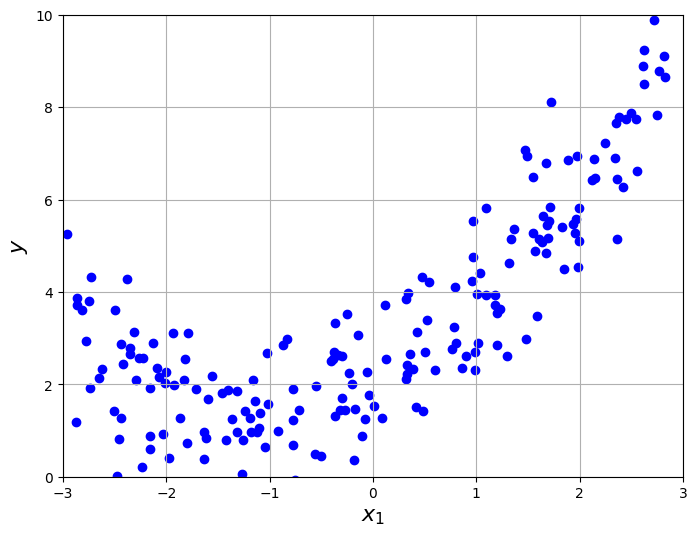

In [25]:
import matplotlib.pyplot as plt
# Plot 1: Data Scatter Plot

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16)
plt.grid(True)
plt.ylim(0, 10)
plt.xlim(-3, 3)
plt.show()

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature= PolynomialFeatures(degree=2,include_bias=False)
x_poly=poly_feature.fit_transform(X)


In [22]:
X[0]

array([1.64373629])

In [23]:
x_poly[0]

array([1.64373629, 2.701869  ])

In [24]:
ln_reg= LinearRegression()
ln_reg.fit(x_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.69084138]), array([[3.32960458]]))

[2.00540719] [[1.11022126 0.50526985]]


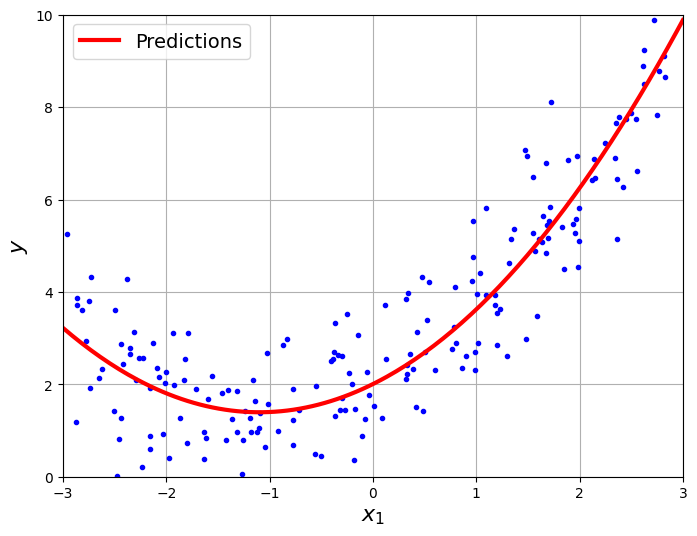

In [29]:
# Plot 2: Prediction Curve


# Polynomial Regression (degree 2)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print(lin_reg.intercept_, lin_reg.coef_)



X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_pred = lin_reg.predict(X_new_poly)


plt.figure(figsize=(8, 6))

# Scatter points
plt.plot(X, y, "b.", markersize=6)

# Prediction curve
plt.plot(X_new, y_pred, "r-", linewidth=3, label="Predictions")

# Labels & Style
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16)
plt.legend(fontsize=14)
plt.grid(True)
plt.xlim(-3, 3)
plt.ylim(0, 10)

plt.show()

#Learning Curve

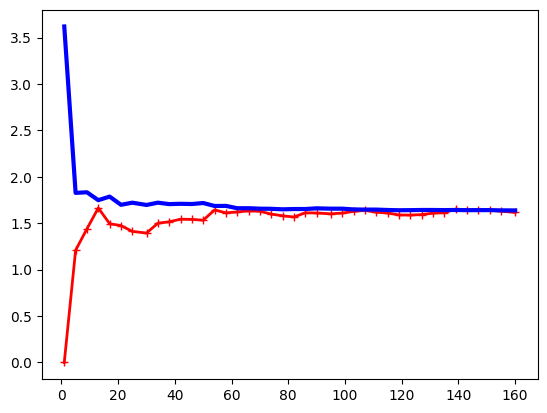

In [30]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
[...]  # beautify the figure: add labels, axis, grid, and legend
plt.show()

**if the model is underfitting the training data, adding more training examples will not help. You need to use a better model or come up with better features.t**

# learning curves of a 10th-degree polynomial model on the same data

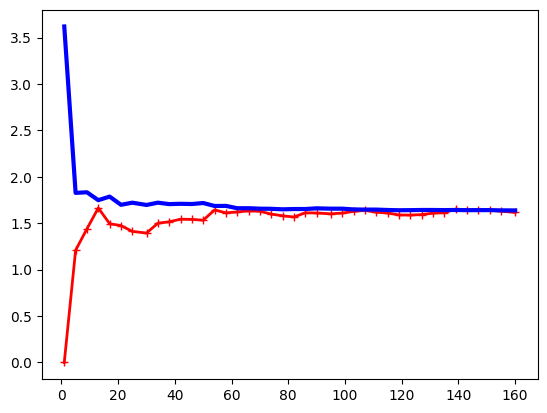

In [34]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train_sizes")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid_scores")
[...]  # beautify the figure: add labels, axis, grid, and legend
plt.show()

# Regularized Linear Models
A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

**Ridge Regression**
It is important to scale the data (e.g., using a StandardScaler) before performing ridge regression, as it is sensitive to the scale of the input features. This is true of most regularized models.

#  ridge regression with Scikit-Learn

In [37]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1,solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([5.06157854])

# and using stochastic gradient descent

In [38]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                        max_iter=1000, eta0=0.01, random_state=42)

sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets
sgd_reg.predict([[1.5]])

array([5.06208065])

In [40]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.00803756])

# Elastic Net Regression

In [41]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.006944])

#Early Stopping
**A different way to regularize iterative learning algorithms such as gradient descent is to stop training as soon as the validation error reaches a minimum. This popular technique is called early stopping.  shows a complex model (in this case, a high-degree polynomial regression model) being trained with batch gradient descent on the quadratic dataset we used earlier. As the epochs go by, the algorithm learns, and its prediction error (RMSE) on the training set goes down, along with its prediction error on the validation set. After a while, though, the validation error stops decreasing and starts to go back up. This indicates that the model has started to overfit the training data. With early stopping you just stop training as soon as the validation error reaches the minimum. It is such a simple and efficient regularization technique that Geoffrey Hinton called it a “beautiful free lunch”.⁠13 That said, the validation error sometimes comes back down after a while: this is called double descent. It’s fairly common with large neural networks, and is an area of active research.**

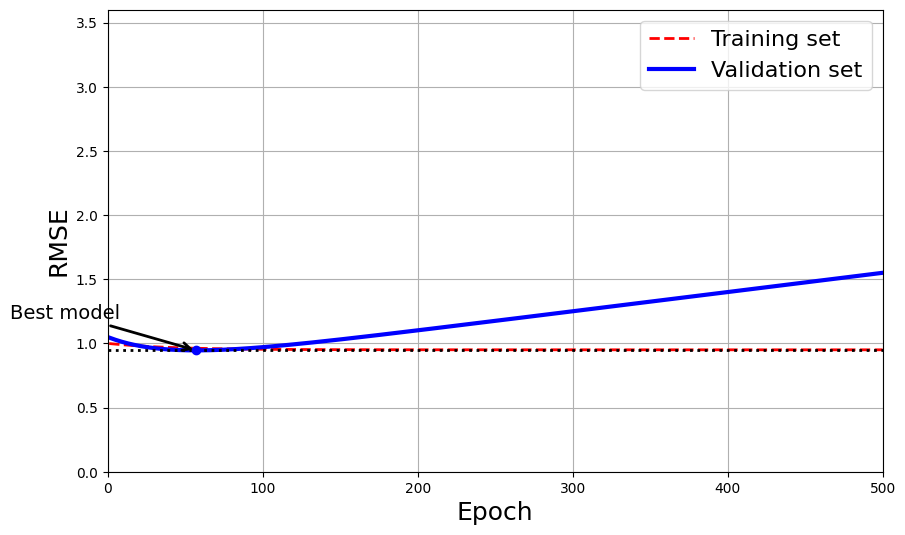

In [42]:
import numpy as np
import matplotlib.pyplot as plt

epochs = np.arange(1, 501)

train_rmse = 0.95 + 0.05*np.exp(-epochs / 40)     # fake smooth curve
valid_rmse = 1.1 + 0.25*np.exp(-epochs / 40) + 0.0015*(epochs - 200)

# Best model index (minimum validation RMSE)
best_index = np.argmin(valid_rmse)
best_epoch = epochs[best_index]
best_rmse = valid_rmse[best_index]


plt.figure(figsize=(10, 6))

# Training curve
plt.plot(epochs, train_rmse, "r--", linewidth=2, label="Training set")

# Validation curve
plt.plot(epochs, valid_rmse, "b-", linewidth=3, label="Validation set")

# Horizontal dotted line
plt.axhline(y=best_rmse, color='black', linestyle=':', linewidth=2)

# Mark best model
plt.plot(best_epoch, best_rmse, "bo")
plt.annotate("Best model",
             xy=(best_epoch, best_rmse),
             xytext=(best_epoch - 120, best_rmse + 0.25),
             arrowprops=dict(arrowstyle="->", color="black", lw=2),
             fontsize=14)

# Labels
plt.xlabel("Epoch", fontsize=18)
plt.ylabel("RMSE", fontsize=18)

plt.xlim(0, 500)
plt.ylim(0, 3.6)

plt.grid(True)
plt.legend(fontsize=16)
plt.show()


#Logistic Regression
Let’s try to build a classifier to detect the Iris virginica type based only on the petal width feature. The first step is to load the data and take a quick peek:

In [44]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [45]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [46]:
iris.target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [47]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Next we’ll split the data and train a logistic regression model on the training set:



In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

Let’s look at the model’s estimated probabilities for flowers with petal widths varying from 0 cm to 3 cm

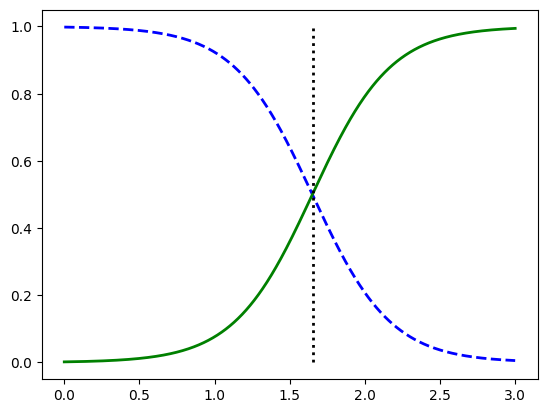

In [49]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")
[...] # beautify the figure: add grid, labels, axis, legend, arrows, and samples
plt.show()

In [50]:
decision_boundary

np.float64(1.6516516516516517)

In [51]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])